# Final Model Validation

### This notebook contains our final model trained against the entirety of the training set and validated against the testing set. To find our model testing and iterations, please consult the following links where we attempt various activation functions:

#### tanh:
#### softmax:
#### relu:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models, layers, regularizers
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_data_dir = 'ZhangLabData/CellData/chest_xray/train'
test_data_dir = 'ZhangLabData/CellData/chest_xray/test'

#Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
       test_data_dir, 
       target_size=(64, 64), batch_size=624, color_mode='grayscale', class_mode='binary')

#Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
       train_data_dir, 
       target_size=(64, 64), batch_size=5232, color_mode='grayscale', class_mode='binary')

#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


#### Reshape  images

In [3]:
#train set
train_unrow = train_images.reshape(5232, -1)
train_unrow.shape

(5232, 4096)

In [4]:
#test set
test_unrow = test_images.reshape(624, -1)
test_unrow.shape

(624, 4096)

#### Labels for images

In [5]:
train_labels[:10]

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [6]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
train_unrow

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [53., 52., 19., ..., 16., 21., 19.],
       [19., 29., 43., ...,  0.,  0.,  0.],
       ...,
       [62., 75., 85., ...,  0.,  0.,  0.],
       [ 6., 13., 20., ...,  0.,  0.,  0.],
       [57., 59., 31., ..., 44., 44., 45.]], dtype=float32)

In [8]:
#scaling the data
train_img_final = train_unrow/255
test_img_final = test_unrow/255

type(train_img_final)

numpy.ndarray

In [9]:
test_labels[:10]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
print(train_img_final.shape)
print(test_img_final.shape)

(5232, 4096)
(624, 4096)


In [11]:


early_stopping = [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='best_model.h5',
                                                                                 monitor='val_loss', save_best_only=True)]

In [12]:
#plot epochs vs loss for train and test set
def visualize_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss v Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show();
    
    plt.figure()
    plt.plot(history['val_recall'])
    plt.plot(history['recall'])
    plt.legend(['val_recall', 'recall'])
    plt.title('Epochs v Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.show();

In [13]:
#CNN model
np.random.seed(42)
model3 = models.Sequential()
model3.add(layers.Conv2D(2, (3,3), activation='relu',
                        input_shape=(64, 64, 1)))

model3.add(layers.Flatten())
# model3.add(layers.Dense(64, activation='selu'))
# model3.add(layers.Dense(42, activation='selu'))
model3.add(layers.Dense(2, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 2)         20        
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 15378     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 15,401
Trainable params: 15,401
Non-trainable params: 0
_________________________________________________________________


In [15]:

optimizer = keras.optimizers.SGD(lr=0.00001)
model3.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

results3 = model3.fit(train_images,
                    train_labels,
                    callbacks=early_stopping,
                    epochs=10,
                    batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
41/41 [==============================] - 2s 48ms/step - loss: 0.6620 - recall: 0.9912 - val_loss: 0.6938 - val_recall: 1.0000
Epoch 2/10
41/41 [==============================] - 2s 39ms/step - loss: 0.6617 - recall: 1.0000 - val_loss: 0.6936 - val_recall: 1.0000
Epoch 3/10
41/41 [==============================] - 2s 45ms/step - loss: 0.6615 - recall: 1.0000 - val_loss: 0.6934 - val_recall: 1.0000
Epoch 4/10
41/41 [==============================] - 2s 40ms/step - loss: 0.6612 - recall: 1.0000 - val_loss: 0.6932 - val_recall: 1.0000
Epoch 5/10
41/41 [==============================] - 2s 40ms/step - loss: 0.6609 - recall: 1.0000 - val_loss: 0.6930 - val_recall: 1.0000
Epoch 6/10
41/41 [==============================] - 2s 39ms/step - loss: 0.6607 - recall: 1.0000 - val_loss: 0.6928 - val_recall: 1.0000
Epoch 7/10
41/41 [==============================] - 2s 38ms/step - loss: 0.6604 - recall: 1.0000 - val_loss: 0.6926 - val_recall: 1.0000
Epoch 8/10
41/41 [=======================

In [16]:
history = results3.history
print(history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


In [17]:
results_train3 = model3.evaluate(train_images, train_labels)

164/164 [==============================] - 1s 5ms/step - loss: 0.6595 - recall: 1.0000


In [18]:
results_test3 = model3.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 5ms/step - loss: 0.6919 - recall: 1.0000


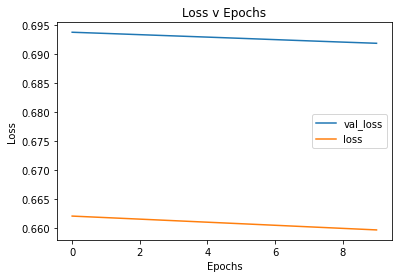

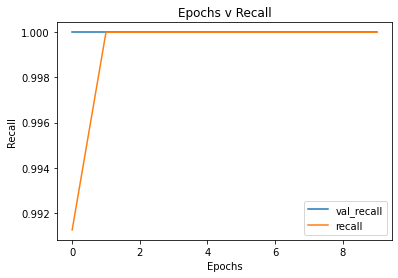

In [19]:
visualize_results(results3)

In [20]:

label_pred = (model3.predict(test_images) > 0.5).astype(int)

cf_matrix = confusion_matrix(test_labels, label_pred)

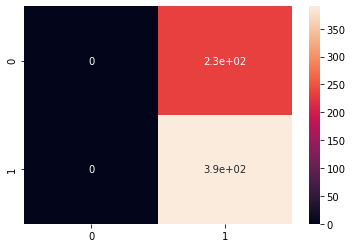

In [21]:

sns.heatmap(cf_matrix, annot=True);